# 1. Install and import dependencies

In [1]:
#!pip install pycaret

In [2]:
import pandas as pd
from pycaret.classification import *

# 2. Load data

In [3]:
df = pd.read_csv('../bank-full.csv')

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

# 3. Train and evaluate model

In [7]:
cat_features =[ 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact',  'month', 'poutcome']

In [8]:
experiment = setup(df, target='y', categorical_features=cat_features, fix_imbalance=True, create_clusters=True)

,Description,Value
0,session_id,3627
1,Target,y
2,Target Type,Binary
3,Label Encoded,"no: 0, yes: 1"
4,Original Data,"(45211, 17)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


In [9]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9099,0.9374,0.5249,0.6392,0.5761,0.5263,0.5297,11.7180
lightgbm,Light Gradient Boosting Machine,0.9088,0.9344,0.5146,0.6356,0.5683,0.5180,0.5219,0.4360
gbc,Gradient Boosting Classifier,0.9073,0.9243,0.5249,0.6226,0.5691,0.5177,0.5203,4.6780
xgboost,Extreme Gradient Boosting,0.9063,0.9324,0.4997,0.6237,0.5544,0.5029,0.5069,4.8750
rf,Random Forest Classifier,0.9049,0.9259,0.4112,0.6450,0.5019,0.4522,0.4664,1.7020
ada,Ada Boost Classifier,0.8978,0.9017,0.4930,0.5737,0.5298,0.4729,0.4749,1.0660
et,Extra Trees Classifier,0.8975,0.9101,0.3996,0.5899,0.4761,0.4217,0.4317,2.9760
dummy,Dummy Classifier,0.8832,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0900
dt,Decision Tree Classifier,0.8792,0.7198,0.5119,0.4841,0.4974,0.4288,0.4292,0.2860
ridge,Ridge Classifier,0.8492,0.0000,0.7846,0.4221,0.5487,0.4679,0.5005,0.1000


# 4. Creating the model

In [10]:
model_cb = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9144,0.9385,0.5528,0.6581,0.6009,0.5533,0.5560
1,0.9201,0.9409,0.5811,0.6869,0.6296,0.5851,0.5877
2,0.9062,0.9337,0.5162,0.6181,0.5626,0.5105,0.5131
3,0.9062,0.9345,0.4865,0.6272,0.5479,0.4965,0.5015
4,0.9109,0.9413,0.5243,0.6467,0.5791,0.5299,0.5335
5,0.9115,0.9409,0.5486,0.6424,0.5918,0.5426,0.5447
6,0.9084,0.9375,0.5432,0.6242,0.5809,0.5298,0.5314
7,0.9080,0.9331,0.5230,0.6266,0.5702,0.5191,0.5218
8,0.9036,0.9316,0.4661,0.6143,0.5300,0.4775,0.4831


In [11]:
model_lgb = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9081,0.9329,0.5257,0.6258,0.5714,0.5204,0.5228
1,0.9213,0.9406,0.5784,0.6971,0.6322,0.5886,0.5918
2,0.9068,0.9324,0.5432,0.6147,0.5768,0.5246,0.5259
3,0.9052,0.9314,0.4703,0.6259,0.5370,0.4854,0.4916
4,0.9115,0.9417,0.5162,0.6541,0.5770,0.5284,0.5330
5,0.9081,0.9368,0.5216,0.6287,0.5702,0.5192,0.5220
6,0.9068,0.9346,0.5216,0.6206,0.5668,0.5150,0.5175
7,0.9071,0.9288,0.5230,0.6206,0.5676,0.5160,0.5184
8,0.9055,0.9282,0.4580,0.6306,0.5306,0.4795,0.4871


In [12]:
model_lgb = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9109,0.9248,0.5393,0.6399,0.5853,0.5358,0.5382
1,0.9197,0.9333,0.5811,0.6847,0.6287,0.5840,0.5865
2,0.9071,0.9212,0.5622,0.6118,0.5859,0.5337,0.5343
3,0.9017,0.9172,0.4730,0.6014,0.5295,0.4755,0.4798
4,0.9128,0.9304,0.5297,0.6577,0.5868,0.5387,0.5427
5,0.9068,0.9295,0.5405,0.6154,0.5755,0.5234,0.5248
6,0.9008,0.9283,0.5162,0.5859,0.5489,0.4934,0.4946
7,0.9049,0.9177,0.5339,0.6043,0.5669,0.5137,0.5149
8,0.9030,0.9149,0.4634,0.6107,0.5270,0.4740,0.4796


# Tuning the Model

In [13]:
tuned_model = tune_model(model_cb, choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9150,0.9374,0.5420,0.6667,0.5979,0.5510,0.5546
1,0.9213,0.9409,0.5622,0.7051,0.6256,0.5822,0.5869
2,0.9090,0.9339,0.5378,0.6297,0.5802,0.5295,0.5316
3,0.9065,0.9305,0.4730,0.6341,0.5418,0.4909,0.4975
4,0.9087,0.9414,0.5000,0.6401,0.5615,0.5114,0.5162
5,0.9122,0.9387,0.5243,0.6554,0.5826,0.5342,0.5383
6,0.9049,0.9373,0.5081,0.6124,0.5554,0.5027,0.5054
7,0.9125,0.9315,0.5312,0.6533,0.5859,0.5376,0.5412
8,0.9061,0.9290,0.4336,0.6452,0.5186,0.4688,0.4802


In [14]:
# import numpy as np

# model_cat = create_model('catboost', verbose = False)

# params = {'iterations': np.arange(100, 1000, 100),
#          'max_depth': np.arange(1, 10),
#          'learning_rate': np.arange(0.01, 1, 0.01),  
#          'random_strength': np.arange(0.1, 1.0, 0.1),
#          'l2_leaf_reg': np.arange(1, 100),
#          'border_count': np.arange(1, 256)}

# tuned_model = tune_model(model_cat, optimize = 'Accuracy', fold = 10,
#             tuner_verbose = False, search_library = 'scikit-optimize',
#             custom_grid = params, n_iter = 50)

# Making Predictions

In [15]:
predictions = predict_model(tuned_model)

predictions.head(10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9074,0.9351,0.4978,0.6349,0.5581,0.5072,0.5119


,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,data_cluster_13,data_cluster_14,data_cluster_15,data_cluster_16,data_cluster_17,data_cluster_18,data_cluster_19,y,Label,Score
0,34.0,194.0,15.0,149.0,1.0,268.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,no,no,0.9720
1,36.0,189.0,19.0,136.0,1.0,120.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,no,no,0.9924
2,55.0,0.0,29.0,88.0,2.0,-1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,no,no,0.9959
3,73.0,542.0,26.0,355.0,1.0,180.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,yes,yes,0.6532
4,31.0,503.0,20.0,178.0,1.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,no,no,0.9648
5,42.0,1333.0,14.0,468.0,2.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,no,no,0.9584
6,35.0,0.0,17.0,199.0,1.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,no,no,0.9902
7,55.0,283.0,14.0,220.0,2.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,no,no,0.9970
8,48.0,194.0,14.0,263.0,1.0,-1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,no,no,0.9567
9,34.0,0.0,28.0,1025.0,2.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,no,no,0.5865


# Plotting the Model

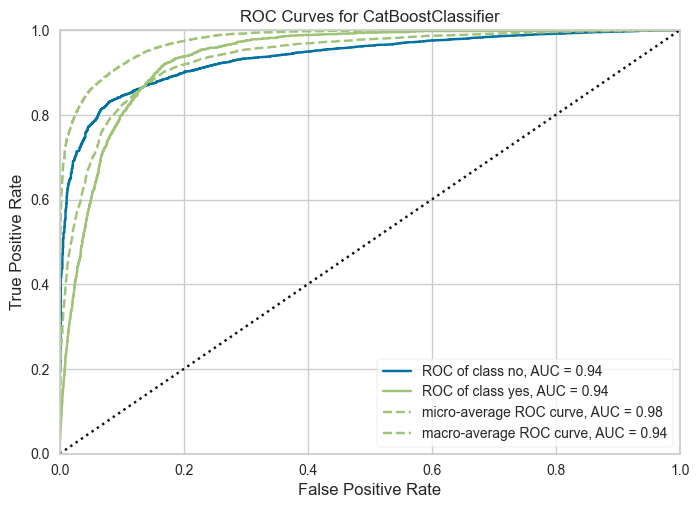

In [16]:
plot_model(model_cb)

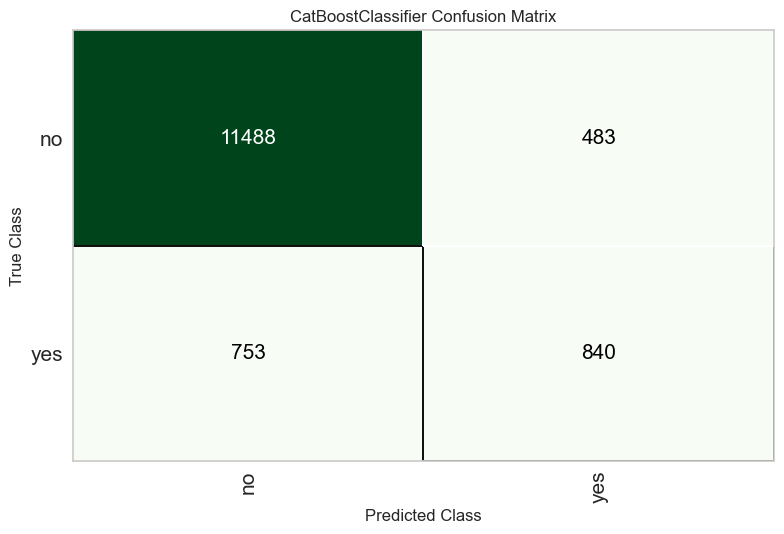

In [17]:
plot_model(model_cb, 'confusion_matrix')

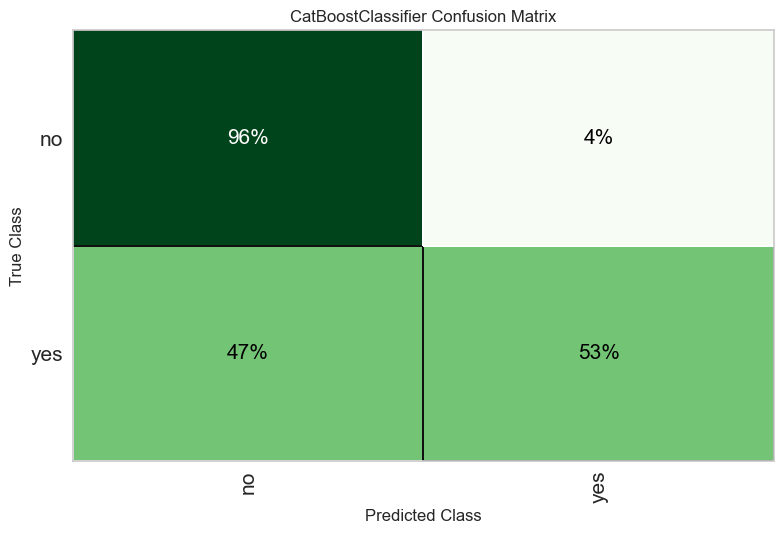

In [18]:
plot_model(model_cb, 'confusion_matrix', plot_kwargs={'percent': True})

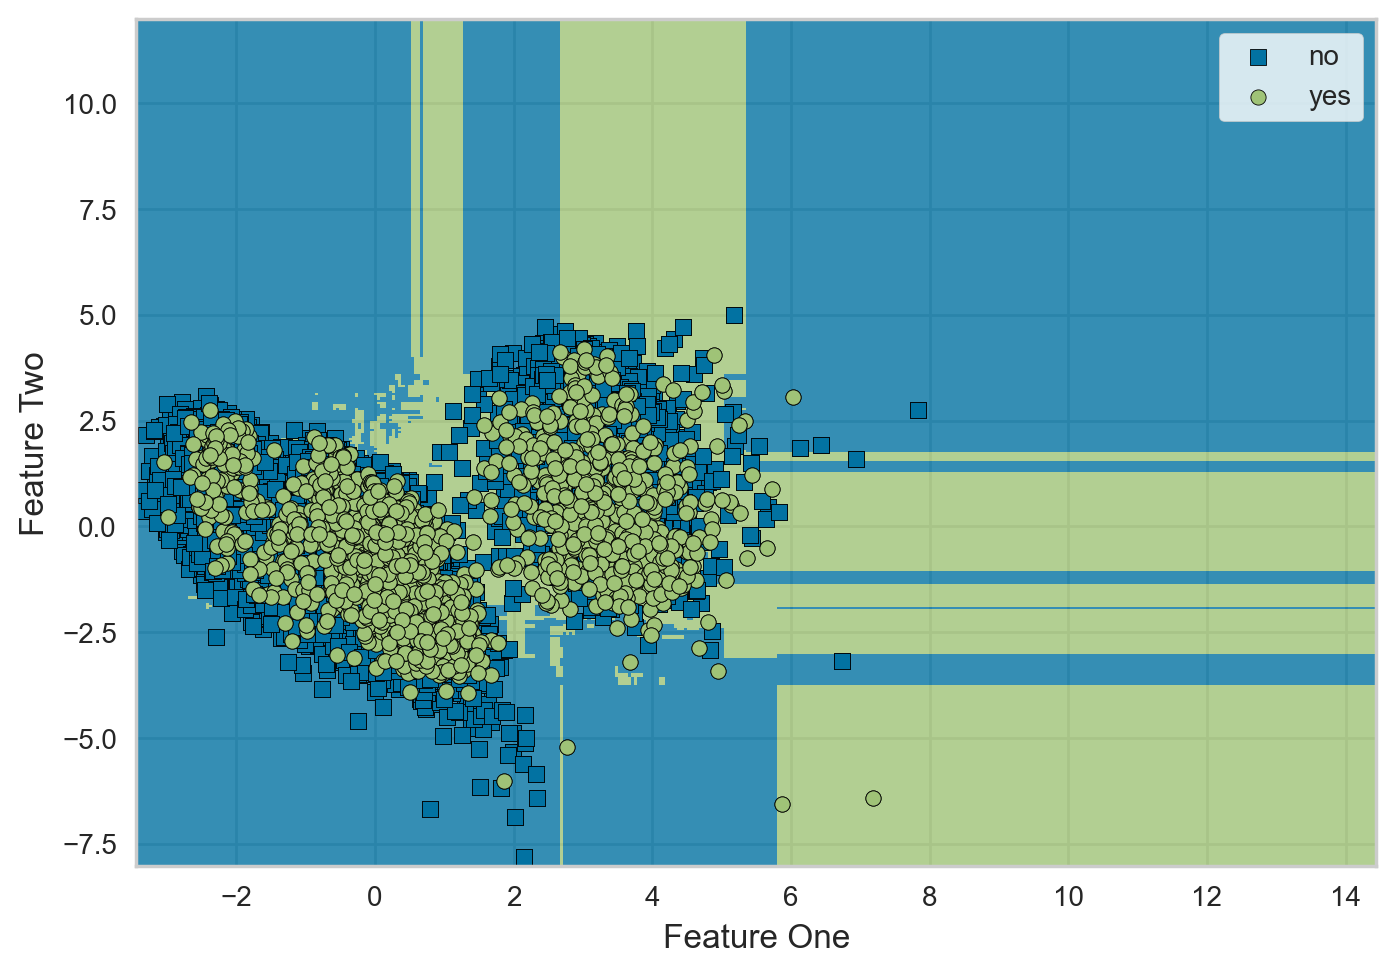

In [19]:
plot_model(model_cb, 'boundary', scale = 2)

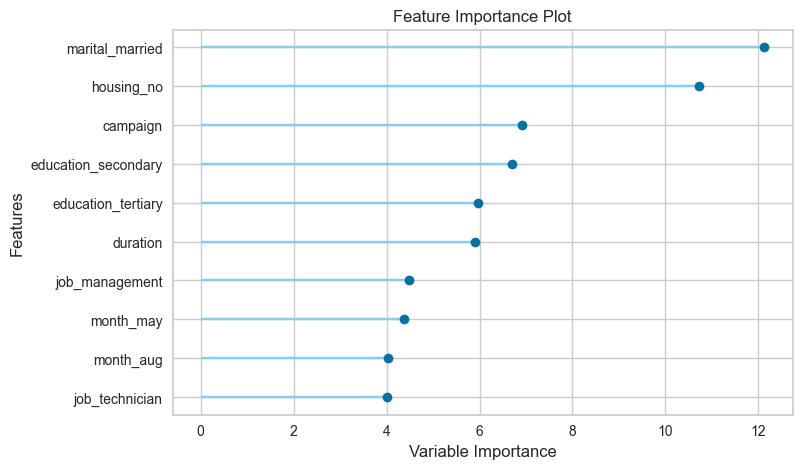

In [20]:
# plot feature importance
plot_model(model_cb, plot = 'feature')

# Finalizing and Saving the Model


In [21]:
final_model = finalize_model(model_cb)

save_model(final_model, 'catboost_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['job', 'marital',
                                                             'education',
                                                             'default',
                                                             'housing', 'loan',
                                                             'contact', 'month',
                                                             'poutcome'],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='y',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_...
                  Cluster_Entire_Data(check_clusters_upto=None,